In [1]:
# 需要3.4版本matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
def standard_fig_save(save_path, file_name, file_format="png"):
    # don't need to set format
    fig_filename = os.path.join(save_path, file_name + '.' + file_format)
#     utils.makedirs(os.path.dirname(fig_filename))
    plt.savefig(fig_filename, dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close()


# 全局设置 pdfa字体
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']

# 全局设置times new roman字体
# params={'font.family':'serif',
#         'font.serif':'Times New Roman',
# #         'font.style':'italic',
#         'font.weight':'normal', #or 'blod'
#         'font.size':20,#or large,small
#         }
# plt.rcParams.update(params)

params={'font.size':15}
plt.rcParams.update(params)


label_font_s = 35
tick_font_s = 40
legend_font_s = 15
linewidth = 3
markersize = 5
figsize = (5, 4)

E:\ProgramData\Anaconda3\envs\ManifoldFlow\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


In [2]:
path = r"D:\projects\SF\toy_example\results\vgae_ablation.csv"

save_path = r"D:\projects\SF\toy_example\data\不同的GNN"
b = ['ablation-vgaemu', 'ablation-vgae', 'ablation-gcn']
d = [r'$\mathcal{N}(\bm{\mu}, \bm{\sigma}^2)$', r"$\mathcal{N}(\bm{0}, \bm{I}^2)$", 'GCN']
a = [r"YC01_rel", r"YC02_rel", r"DDH_left", r"DDH_right"]
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

asd = [3,4,2,2]
best = [0.016, 0.013, 0.052, 0.060]
c = [0.2]

data = pd.read_csv(path)

In [3]:
# data 的第一维是dataset，第二维是manifold
data['rmse'] = data['rmse'].astype('float32')
mani_list = []
data_list = []

for j in range(len(a)):
    mani_list = []
    for mani in b:
        ll = data[(data['key'] == mani) & (data['data_set'] == a[j])]['rmse'].values.tolist()
        if len(ll)==0:
            print(mani, a[j])
        mani_list.append(ll)
    data_list.append(mani_list)

In [4]:
def read_data(se):
    path = r"D:\projects\SF\toy_example\results\流形对比数据{}.csv".format(se)
    data = pd.read_csv(path)
    # data 的第一维是dataset，第二维是manifold
    data['rmse'] = data['rmse'].astype('float32')
    mani_list = []
    data_list = []

    for j in range(len(a)):
        mani_list = []
        for mani in b:
            ll = data[(data['key'] == mani) & (data['data_set'] == a[j])]['rmse'].values.tolist()
#             if len(ll)==0:
#                 print(mani, a[j])
            mani_list.append(ll)
        data_list.append(mani_list)
    return data_list

四张图，每张图上n个流形方法的性能对比

In [5]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, fontsize=label_font_s)
    ax.set_xlim(0.25, len(labels) + 0.75)

In [6]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

# 基础实验代码 直接转code即可
choosed_data = data_list[3]
figsize = (15, 5)
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
plt.yticks(fontsize=tick_font_s)
plt.xticks(fontsize=tick_font_s)
ax.set_yscale('log') 
ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.5, showextrema=True, points=2000)
# ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)

quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='#ff7052', linestyle='-', lw=10)
# ax.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=2)

ax.set_title(name[3],fontsize=label_font_s)
# ax.set_title(a[idx])
# ax.set_xlabel(a[idx], fontsize=label_font_s)
ax.set_ylabel('RMSE',fontsize=label_font_s)
set_axis_style(ax, b)
# plt.savefig(save_path, dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close()

In [7]:
def draw_violin(choosed_data, title, rset=0, lable="RMSE", log=True):
    # 使用的data是一个list
    figsize = (6, 5)
    plt. clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
    if log:
        ax.set_yscale('log', subs=[10]) 
    plt.yticks(fontsize=tick_font_s)
    plt.xticks(fontsize=tick_font_s)
    ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)
    # ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)
    
    quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
    inds = np.arange(1, len(medians) + 1)
    # ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='#ff7052', linestyle='-', lw=10)
    # ax.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=2)

#     ax.set_title(title, fontsize=label_font_s)
    # ax.set_title(a[idx])
    # ax.set_xlabel(a[idx], fontsize=label_font_s)
    ax.set_ylabel(lable, fontsize=label_font_s)
    set_axis_style(ax, d)
#     plt.savefig(save_path+ r"\{}_{}.png".format(title, log), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
#     plt.close()
    plt.show()

PBG-West_True_4

PBG-East_True_3

HZY-West_True_2

HZY-East_True_2

# a = (np.array(data_list[idx])).tolist()

for i in range(len(data_list)):
    data_list[i] = np.array(data_list[i])
    
# idx 表示数据集不同

In [16]:
path = r"D:\projects\SF\toy_example\results\vgae_ablation.csv"

save_path = r"D:\projects\SF\toy_example\data\不同的GNN"
b = ['ablation-vgaemu', 'ablation-vgae', 'ablation-gcn']
d = [r'$\mathcal{N}(\bm{\mu}, \bm{\sigma}^2)$', r"$\mathcal{N}(\bm{0}, \bm{I}^2)$", 'GCN']
a = [r"YC01_rel", r"YC02_rel", r"DDH_left", r"DDH_right"]
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

asd = [3,4,2,2]
best = [0.016, 0.013, 0.052, 0.060]
c = [0.2]

data = pd.read_csv(path)
# data 的第一维是dataset，第二维是manifold
data['rmse'] = data['rmse'].astype('float32')
mani_list = []
data_list = []

for j in range(len(a)):
    mani_list = []
    for mani in b:
        ll = data[(data['key'] == mani) & (data['data_set'] == a[j])]['rmse'].values.tolist()
        if len(ll)==0:
            print(mani, a[j])
        mani_list.append(ll)
    data_list.append(mani_list)

In [28]:
figsize = (8, 6)

<Figure size 432x288 with 0 Axes>

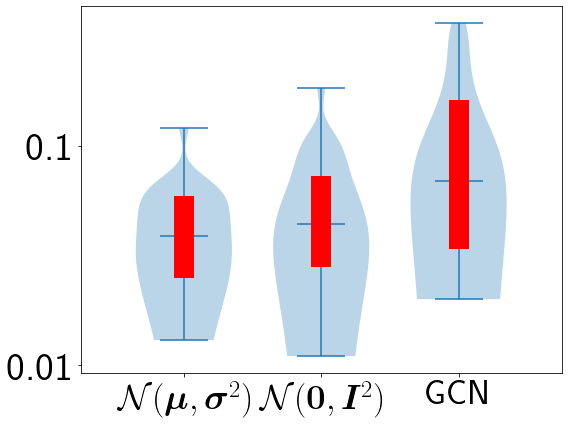

In [29]:
idx = 1
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
rset=0
lable="RMSE"
log=True
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

# 使用的data是一个list
figsize = (8, 6)
plt. clf()
fig, axl = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
# 第一个子图
ax = axl
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.1, 0.01])
ax.set_yticklabels([0.1, 0.01], fontsize=tick_font_s)

ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='r', linestyle='-', lw=20)
set_axis_style(ax, d)
# ax.set_ylabel(lable, fontsize=label_font_s)

plt.savefig(save_path+ r"\{}.pdf".format(title), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close()
plt.show()

<Figure size 432x288 with 0 Axes>

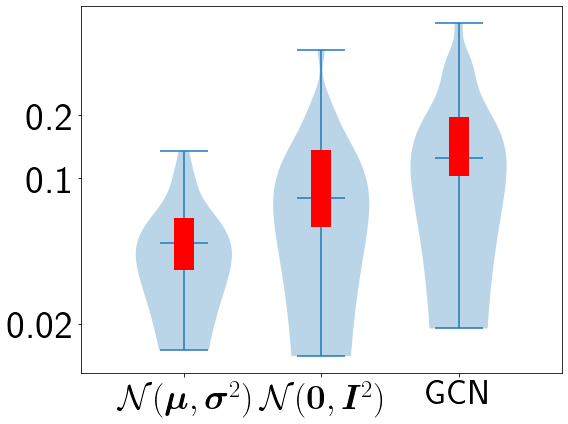

In [37]:
idx = 0
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
rset=0
lable="RMSE"
log=True
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

# 使用的data是一个list
figsize = (8, 6)
plt. clf()
fig, axl = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
# 第一个子图
ax = axl
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.2, 0.1, 0.02])
ax.set_yticklabels([0.2, 0.1, 0.02], fontsize=tick_font_s)

ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='r', linestyle='-', lw=20)
set_axis_style(ax, d)
# ax.set_ylabel(lable, fontsize=label_font_s)

plt.savefig(save_path+ r"\{}.pdf".format(title), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close()
plt.show()

<Figure size 432x288 with 0 Axes>

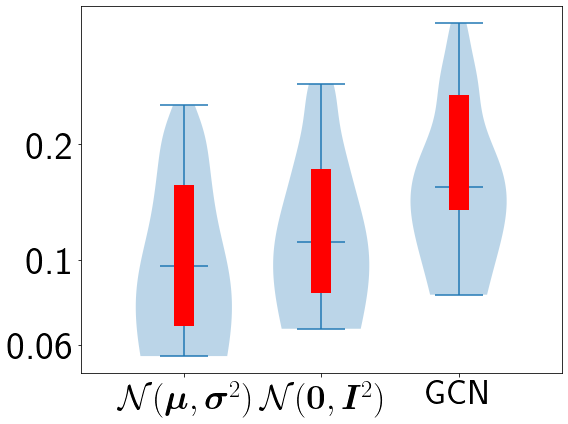

In [40]:
idx = 2
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
rset=0
lable="RMSE"
log=True
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

# 使用的data是一个list
figsize = (8, 6)
plt. clf()
fig, axl = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
# 第一个子图
ax = axl
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.2, 0.1, 0.06])
ax.set_yticklabels([0.2, 0.1, 0.06], fontsize=tick_font_s)

ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='r', linestyle='-', lw=20)
set_axis_style(ax, d)
# ax.set_ylabel(lable, fontsize=label_font_s)

plt.savefig(save_path+ r"\{}.pdf".format(title), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close()
plt.show()

<Figure size 432x288 with 0 Axes>

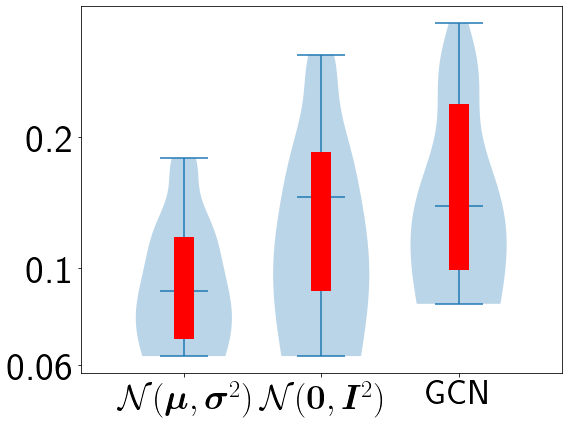

In [42]:
idx = 3
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
rset=0
lable="RMSE"
log=True
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

# 使用的data是一个list
figsize = (8, 6)
plt. clf()
fig, axl = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
# 第一个子图
ax = axl
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.2, 0.1, 0.06])
ax.set_yticklabels([0.2, 0.1, 0.06], fontsize=tick_font_s)

ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='r', linestyle='-', lw=20)
set_axis_style(ax, d)
# ax.set_ylabel(lable, fontsize=label_font_s)

plt.savefig(save_path+ r"\{}.pdf".format(title), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close()
plt.show()

In [9]:
idx = 1
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
rset=0
lable="RMSE"
log=True
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

# 使用的data是一个list
figsize = (15.5, 5)
plt. clf()
fig, axl = plt.subplots(nrows=1, ncols=2, figsize=figsize, tight_layout=True)
# 第一个子图
ax = axl[0]
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.1, 0.01])
ax.set_yticklabels([0.1, 0.01], fontsize=tick_font_s)

ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)
# ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)
    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='#ff7052', linestyle='-', lw=10)
set_axis_style(ax, d)
ax.set_ylabel(lable, fontsize=label_font_s)

# 第二个子图
ax = axl[1]
idx = 0
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.1, 0.01])
ax.set_yticklabels([0.1, 0.01], fontsize=tick_font_s)
ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)
# ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)
    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)

ax.vlines(inds, quartile1, quartile3, color='#ff7052', linestyle='-', lw=10)
set_axis_style(ax, d)
# ax.set_ylabel(lable, fontsize=label_font_s)


plt.savefig(save_path+ r"\{}_{}.pdf".format(title, log), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
plt.close()
# plt.show()

<Figure size 432x288 with 0 Axes>

In [10]:
idx = 2
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
rset=0
lable="RMSE"
log=True
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

# 使用的data是一个list
figsize = (15.5, 5)
plt. clf()
fig, axl = plt.subplots(nrows=1, ncols=2, figsize=figsize, tight_layout=True)
# 第一个子图
ax = axl[0]
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.1, 0.01])
ax.set_yticklabels([0.1, 0.01], fontsize=tick_font_s)

ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)
# ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)
    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='#ff7052', linestyle='-', lw=10)
set_axis_style(ax, d)
ax.set_ylabel(lable, fontsize=label_font_s)

# 第二个子图
ax = axl[1]
idx = 3
temp = np.array(data_list[idx])
choosed_data=(temp).tolist()
title=name[idx]
ax.set_yscale('log', subs=[10]) 
ax.set_yticks([0.1, 0.01])
ax.set_yticklabels([0.1, 0.01], fontsize=tick_font_s)
ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)
# ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)
    
quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)

ax.vlines(inds, quartile1, quartile3, color='#ff7052', linestyle='-', lw=10)
set_axis_style(ax, d)
# ax.set_ylabel(lable, fontsize=label_font_s)


plt.savefig(save_path+ r"\{}_{}.pdf".format(title, log), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
plt.close()
# plt.show()

<Figure size 432x288 with 0 Axes>

针对性的画图

# se 是csv的编号，idx是数据集编号 5-2 5-3 3-2 3-3 3-0


In [30]:
se, idx = 3, 0
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.009, 0, 0., 0.0025, 0.007, 0.002, 0.006, 0.003, 0.00, 0.002]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se)

<Figure size 432x288 with 0 Axes>

In [31]:
se, idx = 3, 2
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.015, 0, 0.002, 0.005, 0.009, 0.003, 0.009, 0.003, 0.005, 0]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se)

<Figure size 432x288 with 0 Axes>

In [32]:
se, idx = 3, 3
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.015, 0, 0.005, 0.004, 0.007, 0.003, 0.005, 0.004, 0.005, 0.003]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se)

<Figure size 432x288 with 0 Axes>

In [33]:
se, idx = 7, 1
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.0091, 0, 0.001, 0.001, 0.002, 0.002, 0.003, 0.001, 0.001, 0.00]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se)

<Figure size 432x288 with 0 Axes>